In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vae_interp.vae import VAE
from vae_interp.sae import SAE
from vae_interp.controls import FeaturesControls
from vae_interp.dataset import load_nouns_dataset, NpyDataset
import matplotlib.pyplot as plt

/home/ubuntu/.cache/pypoetry/virtualenvs/nouns-mech-interp-YeAXWnnL-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
vae = VAE.load_from_dir("./weights/vae")
sae = SAE.load_from_checkpoint("./checkpoints/sae_experiments_small/lr=5.0e-04_l1=5.0e-03/sae_config.json",
                               "./checkpoints/sae_experiments_small/lr=5.0e-04_l1=5.0e-03/sae.pth")

In [4]:
nouns_dataset = load_nouns_dataset(image_size=64, normalize=True)

In [5]:
features_controls = FeaturesControls(
    sae=sae, vae=vae, latent_shape=(4, 4, 4)
)

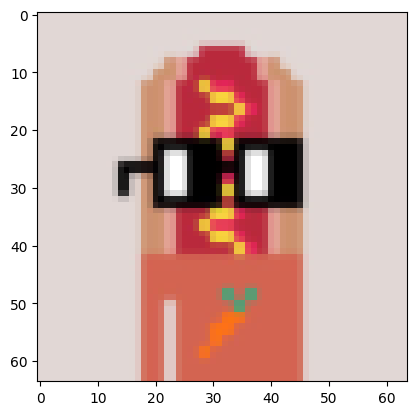

In [9]:
idx = 0
image = nouns_dataset[idx]

plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)

In [10]:
features = features_controls.get_features(image)
features

{5: 0.009116053581237793,
 8: 0.32596075534820557,
 30: 3.116255760192871,
 55: 0.1487685739994049,
 59: 0.1386229395866394,
 116: 0.27306079864501953,
 143: 0.12102887034416199,
 232: 0.21608275175094604,
 278: 0.0121690034866333,
 315: 0.18480157852172852,
 332: 0.06191767752170563,
 501: 0.10811477899551392}

In [13]:
new_features = {**features}
# new_features[202] = 2
# new_features[1] = 3
# new_features[114] = 2
# new_features[497] = 2
# new_features[1] = 2.5
new_features

{5: 0.009116053581237793,
 8: 0.32596075534820557,
 30: 3.116255760192871,
 55: 0.1487685739994049,
 59: 0.1386229395866394,
 116: 0.27306079864501953,
 143: 0.12102887034416199,
 232: 0.21608275175094604,
 278: 0.0121690034866333,
 315: 0.18480157852172852,
 332: 0.06191767752170563,
 501: 0.10811477899551392}

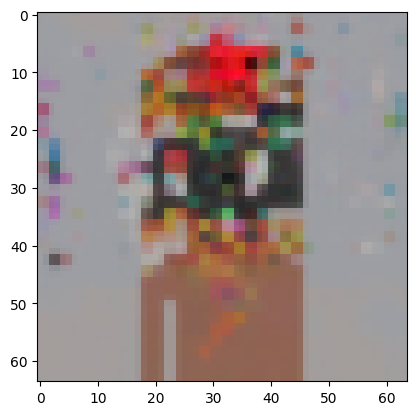

In [14]:
modified_image = features_controls.modify_features(image, new_features)
modified_image = (modified_image - modified_image.min()) / (modified_image.max() - modified_image.min())
modified_image = modified_image.permute(1, 2, 0)

plt.imshow(modified_image)